Afterglows in UV
---------------

### Swift UVOT

- get [data](https://www.swift.ac.uk/archive/ql.php)
- extract [lightcurve](https://www.swift.ac.uk/analysis/uvot/lc.php) 

can take [quick look](https://www.swift.ac.uk/gcn/index.php#target|01095288)

or read a [catalog paper](https://arxiv.org/abs/1701.03713) (catalog is [here](https://swift.gsfc.nasa.gov/results/uvot_grbcat2/))

In [1]:
#caldb_setup_files.tar.Z
from astropy.io import fits
ww=fits.open("/home/limu/Space/data/swift/GRB-Cat.fits")[1]

cnames=[c.name for c in ww.data.columns]

In [55]:
','.join([a.replace('ALP','...') for a in cnames if a[:3]=='ALP' and a[4]=='_'])

'...1_W2,...2_W2,...3_W2,...4_W2,...1_M2,...2_M2,...3_M2,...4_M2,...1_W1,...2_W1,...3_W1,...4_W1,...1_UU,...2_UU,...3_UU,...4_UU,...1_BB,...2_BB,...3_BB,...4_BB,...1_VV,...2_VV,...3_VV,...4_VV,...1_WH,...2_WH,...3_WH,...4_WH'

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  0.,  4., 11.,
        46., 51., 36., 13.,  2.,  0.,  2.]),
 array([-8.1388    , -7.6075096 , -7.0762196 , -6.5449295 , -6.01364   ,
        -5.48235   , -4.95106   , -4.41977   , -3.8884797 , -3.35719   ,
        -2.8258998 , -2.2946098 , -1.7633198 , -1.2320299 , -0.7007399 ,
        -0.16944993,  0.36184007,  0.89313006,  1.42442   ,  1.95571   ,
         2.487     ], dtype=float32),
 <BarContainer object of 20 artists>)

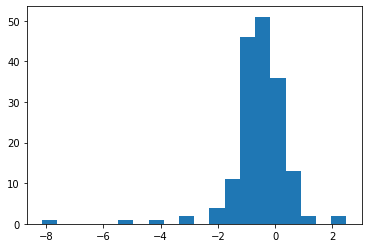

In [5]:
sel=ww.data['ALP1_UU']>-10
from matplotlib import pyplot as pl
pl.hist(ww.data['ALP1_UU'][sel],20)

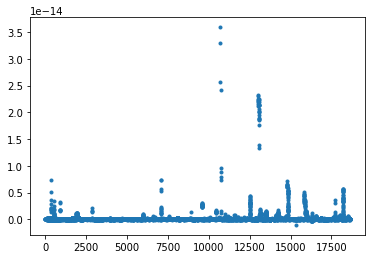

In [58]:
zimg=fits.open("/home/limu/Space/data/swift/Image-Event_3db.fits")[1]
fsel=zimg.data['FILTER']=='U'
fx=zimg.data['FLUX_AA']
pl.plot(fx[fsel],'.')

In [59]:
from collections import Counter
grbs=Counter(list(zimg.data['OBJECT'][fsel]))
sel_obj=[g for g in grbs if grbs[g]>100]
sel_obj[0]

'GRB050824'

In [60]:
sum(fsel)

18627

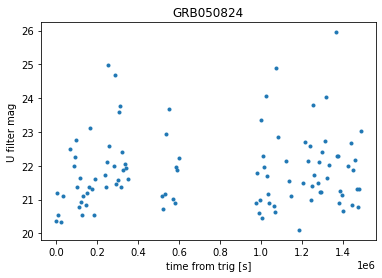

In [86]:
import numpy as np

def sel_plot(name):
    osel=zimg.data['OBJECT']==name
    ids1=np.where(osel*fsel)[0]
    t0=zimg.data['TRIGTIME'][ids1[0]]
    tobs=zimg.data['TSTART'][osel*fsel]-t0
    mag,emag=zimg.data['MAG'][osel*fsel],zimg.data['MAG_ERR'][osel*fsel]
    qsel=mag<99
    pl.plot(tobs[qsel],mag[qsel],'.')#,emag)
    pl.title(sel_obj[0])
    pl.ylabel('U filter mag')
    pl.xlabel('time from trig [s]')
    return [tobs[qsel],mag[qsel],emag[qsel]]
out=sel_plot(sel_obj[1])

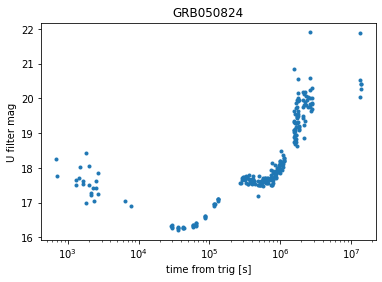

In [68]:
sel_plot(sel_obj[2])
ax=pl.gca()
pl.xscale("log")

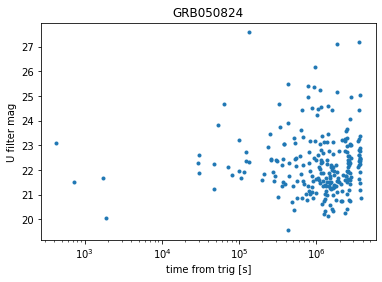

In [69]:
sel_plot(sel_obj[3])
pl.xscale("log")

37

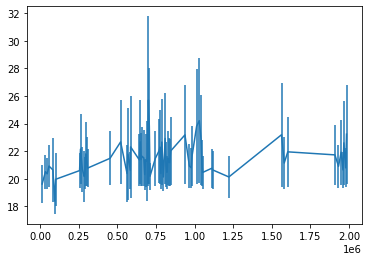

In [62]:
pl.errorbar(tobs[qsel],mag[qsel],emag[qsel])
len(sel_obj)

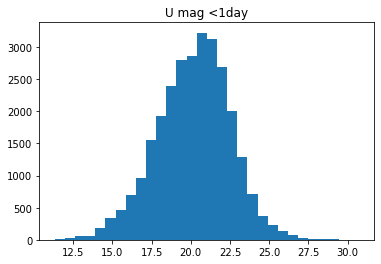

In [53]:
tsel=zimg.data['TSTART']-zimg.data['TRIGTIME']<8.5e4
allmag=zimg.data['MAG'][tsel]
pl.hist(allmag[allmag<99],30)
pl.title('U mag <1day');

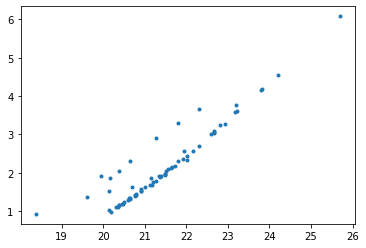

In [73]:
pl.plot(mag[mag<99],emag[mag<99],'.');

In [140]:
ucts={}
for g in grbs:
    if grbs[g]<5: continue
    osel=zimg.data['OBJECT']==g
    t0=zimg.data['TRIGTIME'][osel*fsel][0]
    perr=zimg.data['POS_ERR'][osel*fsel][0]
    tobs=zimg.data['TSTART'][osel*fsel]-t0
    mag,emag=zimg.data['MAG'][osel*fsel],zimg.data['MAG_ERR'][osel*fsel]
    ucts[g]=[grbs[g],min(mag),sum(emag<2),tobs[np.argmin(mag)],perr]

Text(0.5, 1.0, 'no of meas in U with mag_err<2')

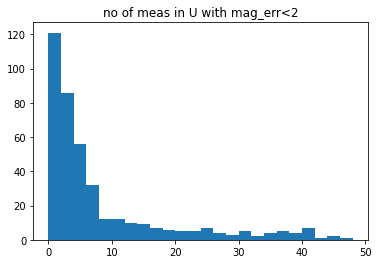

In [84]:
pl.hist([u[2] for u in ucts.values()],np.r_[:50:2])
pl.title("no of meas in U with mag_err<2")

In [141]:
ersel=[k for k in ucts if ucts[k][2]>=10]
posel=[k for k in ucts if ucts[k][-1]<=1]
len(ersel),len(posel)

(120, 236)

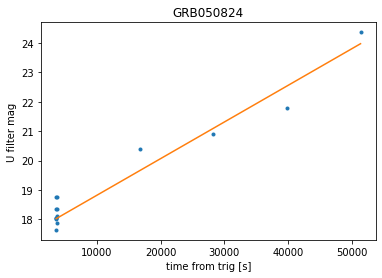

In [88]:
t,y,dy=sel_plot(ersel[0]);#pl.xscale("log");
idx=np.polyfit(t,y,1,w=1/dy)
pl.plot(t,np.polyval(idx,t))

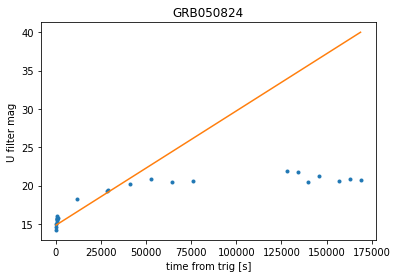

In [93]:
t,y,dy=sel_plot(ersel[2]);#pl.xscale("log");
idx=np.polyfit(t,y,1,w=1/dy)
pl.plot(t,np.polyval(idx,t))

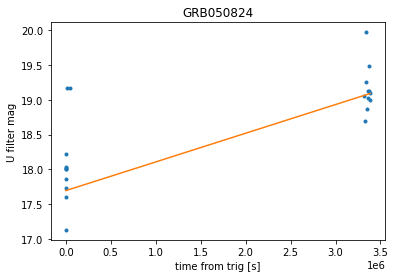

In [94]:
t,y,dy=sel_plot(ersel[4]);#pl.xscale("log");
idx=np.polyfit(t,y,1,w=1/dy)
pl.plot(t,np.polyval(idx,t))

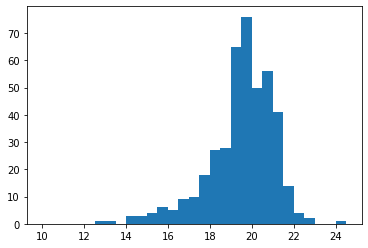

In [95]:
pl.hist([u[1] for u in ucts.values()],np.r_[10:25:.5]);

Text(0, 0.5, 'best mag U')

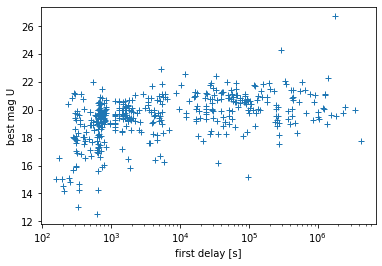

In [100]:
pl.semilogx([u[3] for u in ucts.values() if u[1]<99],[u[1] for u in ucts.values() if u[1]<99],'+')
pl.xlabel("first delay [s]")
pl.ylabel("best mag U")

In [108]:
ucts5={}
for g in grbs:
    if grbs[g]<5: continue
    osel=zimg.data['OBJECT']==g
    t0=zimg.data['TRIGTIME'][osel*fsel][0]
    tobs=zimg.data['TSTART'][osel*fsel]-t0
    mag,emag=zimg.data['MAG'][osel*fsel],zimg.data['MAG_ERR'][osel*fsel]
    aidx=np.argsort(mag)[:5]
    if mag[aidx[-1]]>90: continue
    ucts5[g]=[t0,mag[aidx].mean(),mag[aidx].std(),tobs[aidx].mean()]

Text(0, 0.5, 'best 5 mag U')

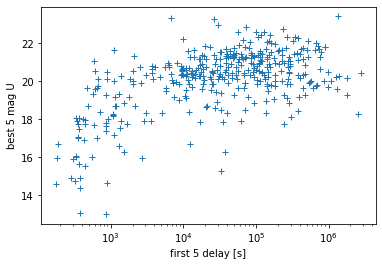

In [106]:
pl.semilogx([u[3] for u in ucts5.values() if u[1]<99],[u[1] for u in ucts5.values() if u[1]<99],'+')
pl.xlabel("first 5 delay [s]")
pl.ylabel("best 5 mag U")

Text(0, 0.5, 'spread best 5 mag U')

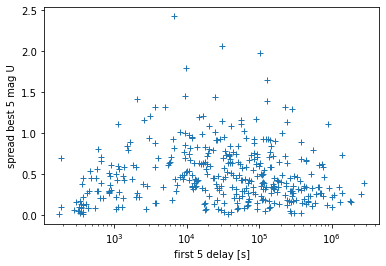

In [107]:
pl.semilogx([u[3] for u in ucts5.values() if u[1]<99],[u[2] for u in ucts5.values() if u[1]<99],'+')
pl.xlabel("first 5 delay [s]")
pl.ylabel("spread best 5 mag U")

(array([16., 22.,  8., 24., 27., 28., 18., 20., 12., 11., 23., 21., 24.,
        19., 24., 25., 11., 16., 24., 10.]),
 array([1.30127623e+08, 1.39370995e+08, 1.48614367e+08, 1.57857739e+08,
        1.67101112e+08, 1.76344484e+08, 1.85587856e+08, 1.94831228e+08,
        2.04074600e+08, 2.13317972e+08, 2.22561344e+08, 2.31804716e+08,
        2.41048088e+08, 2.50291460e+08, 2.59534832e+08, 2.68778205e+08,
        2.78021577e+08, 2.87264949e+08, 2.96508321e+08, 3.05751693e+08,
        3.14995065e+08]),
 <BarContainer object of 20 artists>)

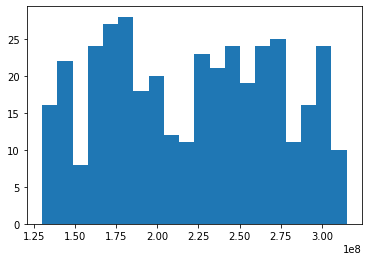

In [111]:
#at0
pl.hist([u[0] for u in ucts5.values()],20)

In [112]:
t0s=[u[0] for u in ucts5.values()]

In [114]:
from datetime import datetime
datetime.fromtimestamp(t0s[0])

datetime.datetime(1974, 2, 15, 3, 33, 43, 200000)

In [118]:
zimg.data['TRIG_UT'][0][:19]

'2005-01-17-12:52:36'

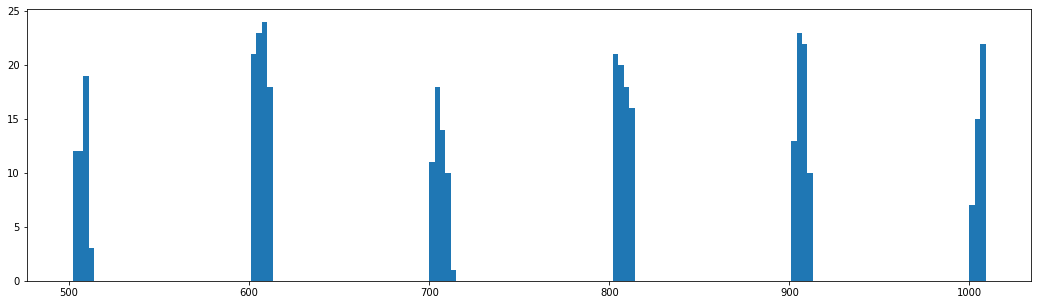

In [127]:
pl.figure(figsize=(18,5))
hoo=pl.hist([int(a[3:7]) for a in ucts5.keys()],np.r_[502:1012:3])[0];

In [143]:
hoo[hoo>0].sum()/24/3
# good detections per month

5.180555555555555

373.0

In [133]:
perr=zimg.data['POS_ERR'][fsel]

In [136]:
perr=zimg.data['POS_ERR'][fsel]
pd=perr[1:]-perr[:-1]
pid=np.where(pd!=0)[0]

Text(0.5, 0, 'position err [deg]')

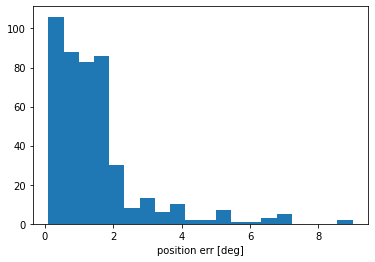

In [139]:
pl.hist(perr[pid-1],20);
pl.xlabel("position err [deg]")

38

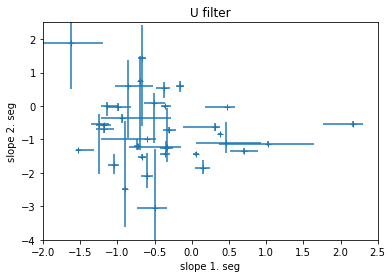

In [145]:
sel=ww.data['ALP1_UU']>-10
sel*=ww.data['ALP2_UU']>-10
#pl.plot(ww.data['ALP1_W1'][sel],ww.data['ALP2_W1'][sel],'+')
er2=[-ww.data['ALP2N_UU'][sel],ww.data['ALP2P_UU'][sel]]
er1=[-ww.data['ALP1N_UU'][sel],ww.data['ALP1P_UU'][sel]]

pl.errorbar(ww.data['ALP1_UU'][sel],ww.data['ALP2_UU'][sel],er2,er1,'+')
pl.title('U filter')
pl.xlabel("slope 1. seg")
pl.ylabel("slope 2. seg")
pl.xlim(-2,2.5)
pl.ylim(-4,2.5)
sum(sel)

### using time profile fit for extrapolation 
to time 5 min

array([-0.39604971, -8.46517995])

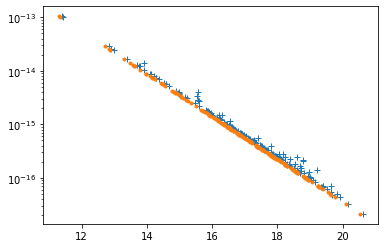

In [177]:
pl.semilogy(ww.data['PEAK_MAG'][sel],ww.data['PEAK_FLUX'][sel],'+')
renorm=np.polyfit(ww.data['PEAK_MAG'][sel],np.log10(ww.data['PEAK_FLUX'][sel]),1)
mag_5min=-(np.log10(ww.data['PEAK_FLUX'][sel])+8.46)*2.5
pl.semilogy(mag_5min,ww.data['PEAK_FLUX'][sel],'.')
renorm

flux=10^(-mag/2.5-8.5)

mag=(log_10(flux)+8.5) . 2.5

79

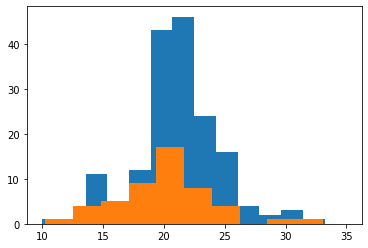

In [175]:
#extrapolated flux
lt0=np.log(5*60) #since burst (?)
sel=ww.data['ALP1_UU']>-10
sel*=ww.data['NORM_UU']>0
flux=ww.data['NORM_UU'][sel]*np.exp(lt0*ww.data['ALP1_UU'][sel])
mag_5min=(np.log10(flux)+8.46)*2.5
#flux2=flux[(flux>0.001)*(flux<3e2)]
pl.hist(mag_5min,np.r_[10:35:15j])
chisel=ww.data["CHISQ_UU"][sel]<2
#mag_5min=(np.log10(flux[chisel])+8.46)*2.5
pl.hist(mag_5min[chisel])#,np.r_[-3:2.5:15j])

sum(mag_5min<21)

In [161]:
#ww.columns
#flux density in erg cm−2 s−1 Å−1

(array([42.,  8.,  8.,  4.,  5.,  2.,  3.,  5., 10.,  4.,  2.,  1.,  3.,
         2.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <BarContainer object of 14 artists>)

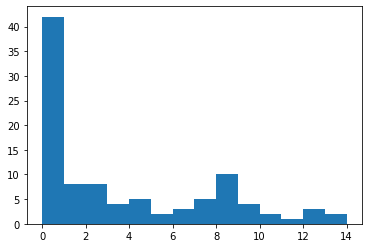

In [163]:
pl.hist(ww.data["CHISQ_UU"][sel],np.r_[:15])